In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [3]:
with open('./codes.json', 'r') as file:
    codes = json.load(file)  

In [4]:
codes = codes['CodeList'][0]['ValidValue']
org_code = []
for i in range(len(codes)):
    if len(codes[i]['Code']) == 2:
        org_code.append(codes[i]['Code'])

In [48]:
cat_dict = {}
for o in range(len(org_code)):
    
    with open(f'./Data/posting_data/USAJOBS_postings_{org_code[o]}.json', 'r') as file:
        data = json.load(file)    

    for i in range(len(data)):
        cat_list = [cat_list for cat_list in data[i]['MatchedObjectDescriptor']['JobCategory']]
        for c in cat_list:
            try:
                cat_dict[c['Name']] += 1
            except:
                cat_dict[c['Name']] = 1

In [50]:
cat_dict = {key: value for key, value in sorted(cat_dict.items(), key=lambda item: item[1])}

In [56]:
cat_dict = OrderedDict(sorted(cat_dict.items(), key=lambda item: item[1], reverse=True))

In [73]:
f_dict = {k: v for k, v in cat_dict.items() if v > 100}

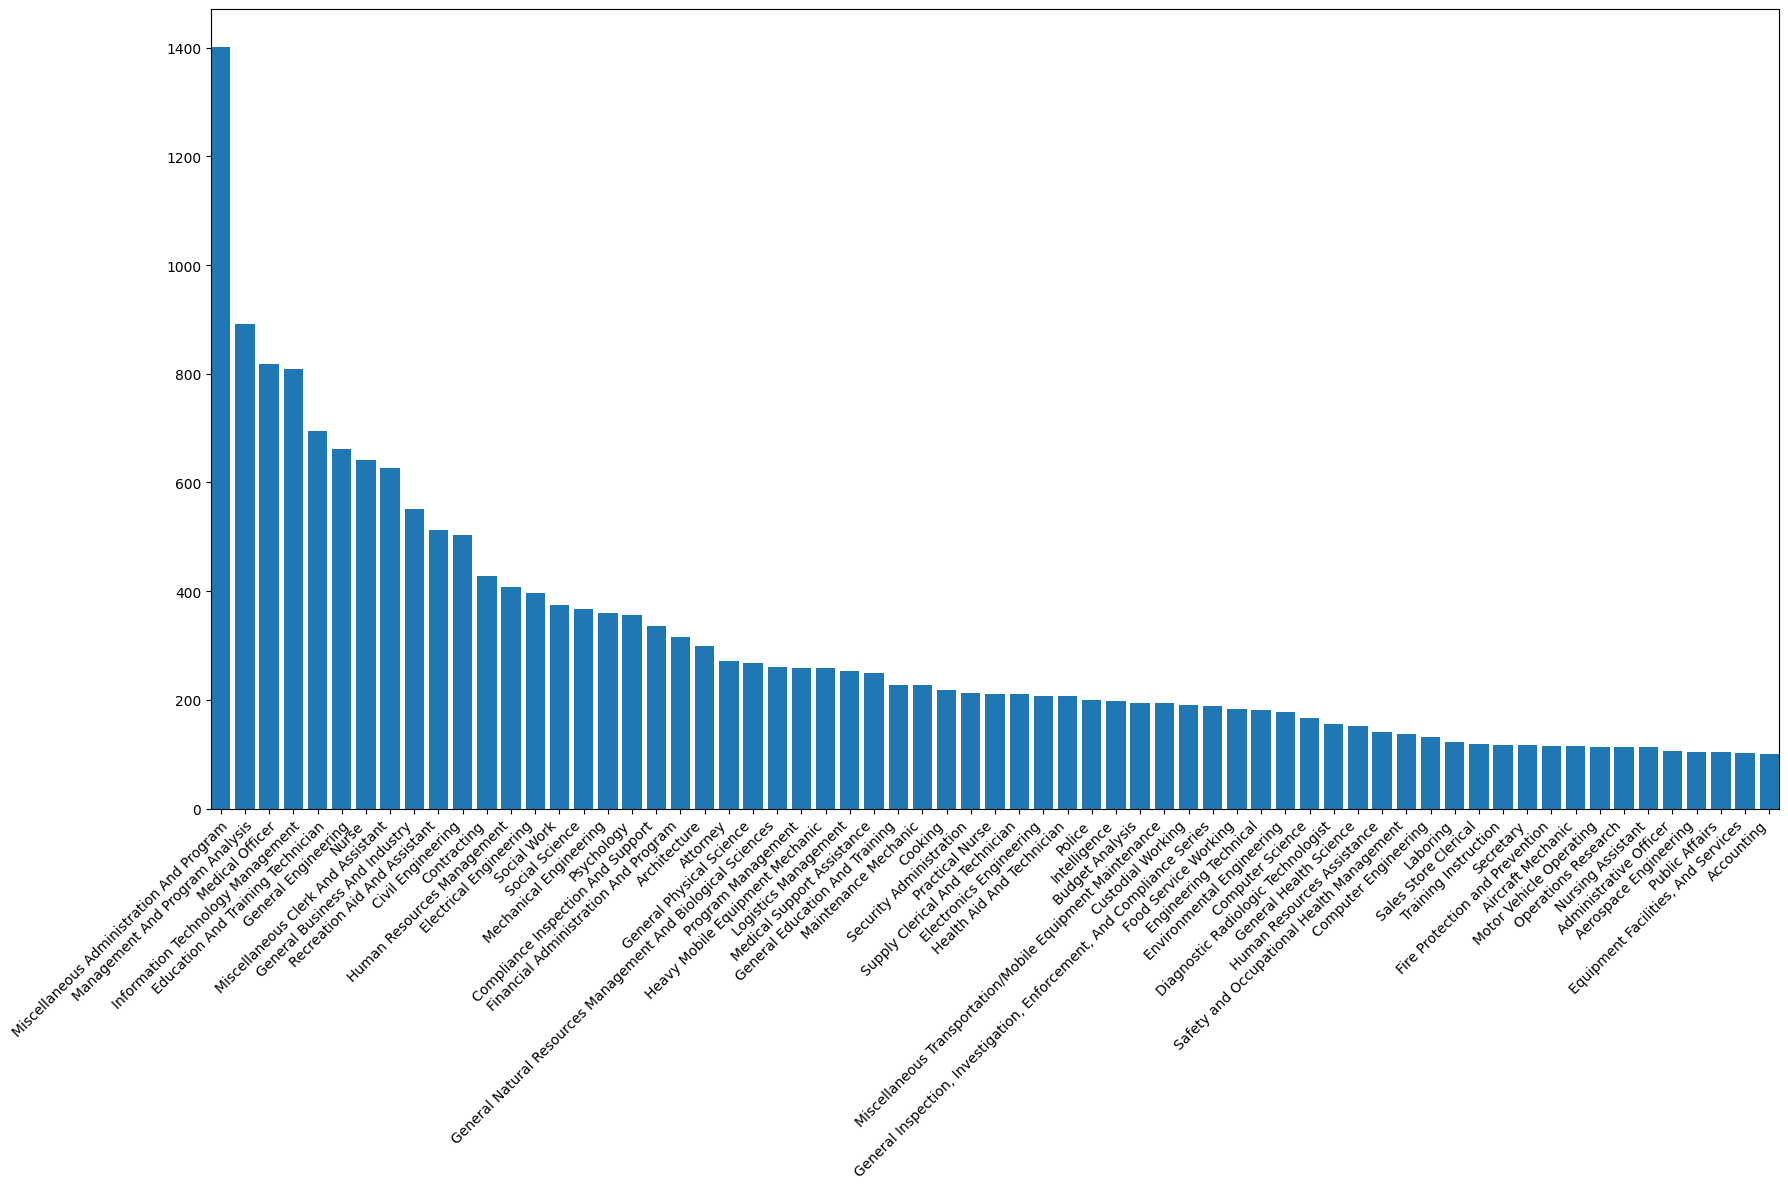

In [79]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,12)
plt.subplot(1,1,1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.margins(x=0)
# ax.tick_params(axis='x', which='major', labelsize=6)
plt.bar(f_dict.keys(), f_dict.values())
plt.tight_layout()
plt.show()

In [110]:
pay_dict = {}
cat_dict_pa = {}
rate_int_dict = {}
for o in range(len(org_code)):
    
    with open(f'./Data/posting_data/USAJOBS_postings_{org_code[o]}.json', 'r') as file:
        data = json.load(file)    

    for i in range(len(data)):
        cat_list = [cat_list for cat_list in data[i]['MatchedObjectDescriptor']['JobCategory']]

        try:
            rate_int_dict[data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['RateIntervalCode']] += 1
        except:
            rate_int_dict[data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['RateIntervalCode']] = 1
        
        for c in cat_list: 
            if data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['RateIntervalCode'] == 'PA':
                try:
                    cat_dict_pa[c['Name']] += 1
                    pay_dict[c['Name']] += (float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MinimumRange']) + float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MaximumRange']))/2
                except:
                    cat_dict_pa[c['Name']] = 1
                    pay_dict[c['Name']] = (float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MinimumRange']) + float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MaximumRange']))/2

In [112]:
for key in pay_dict.keys():
    pay_dict[key] = pay_dict[key]/cat_dict_pa[key]

In [113]:
pay_dict = OrderedDict(sorted(pay_dict.items(), key=lambda item: item[1], reverse=True))

In [125]:
f_dict = {k: v for k, v in pay_dict.items() if v > 120000}

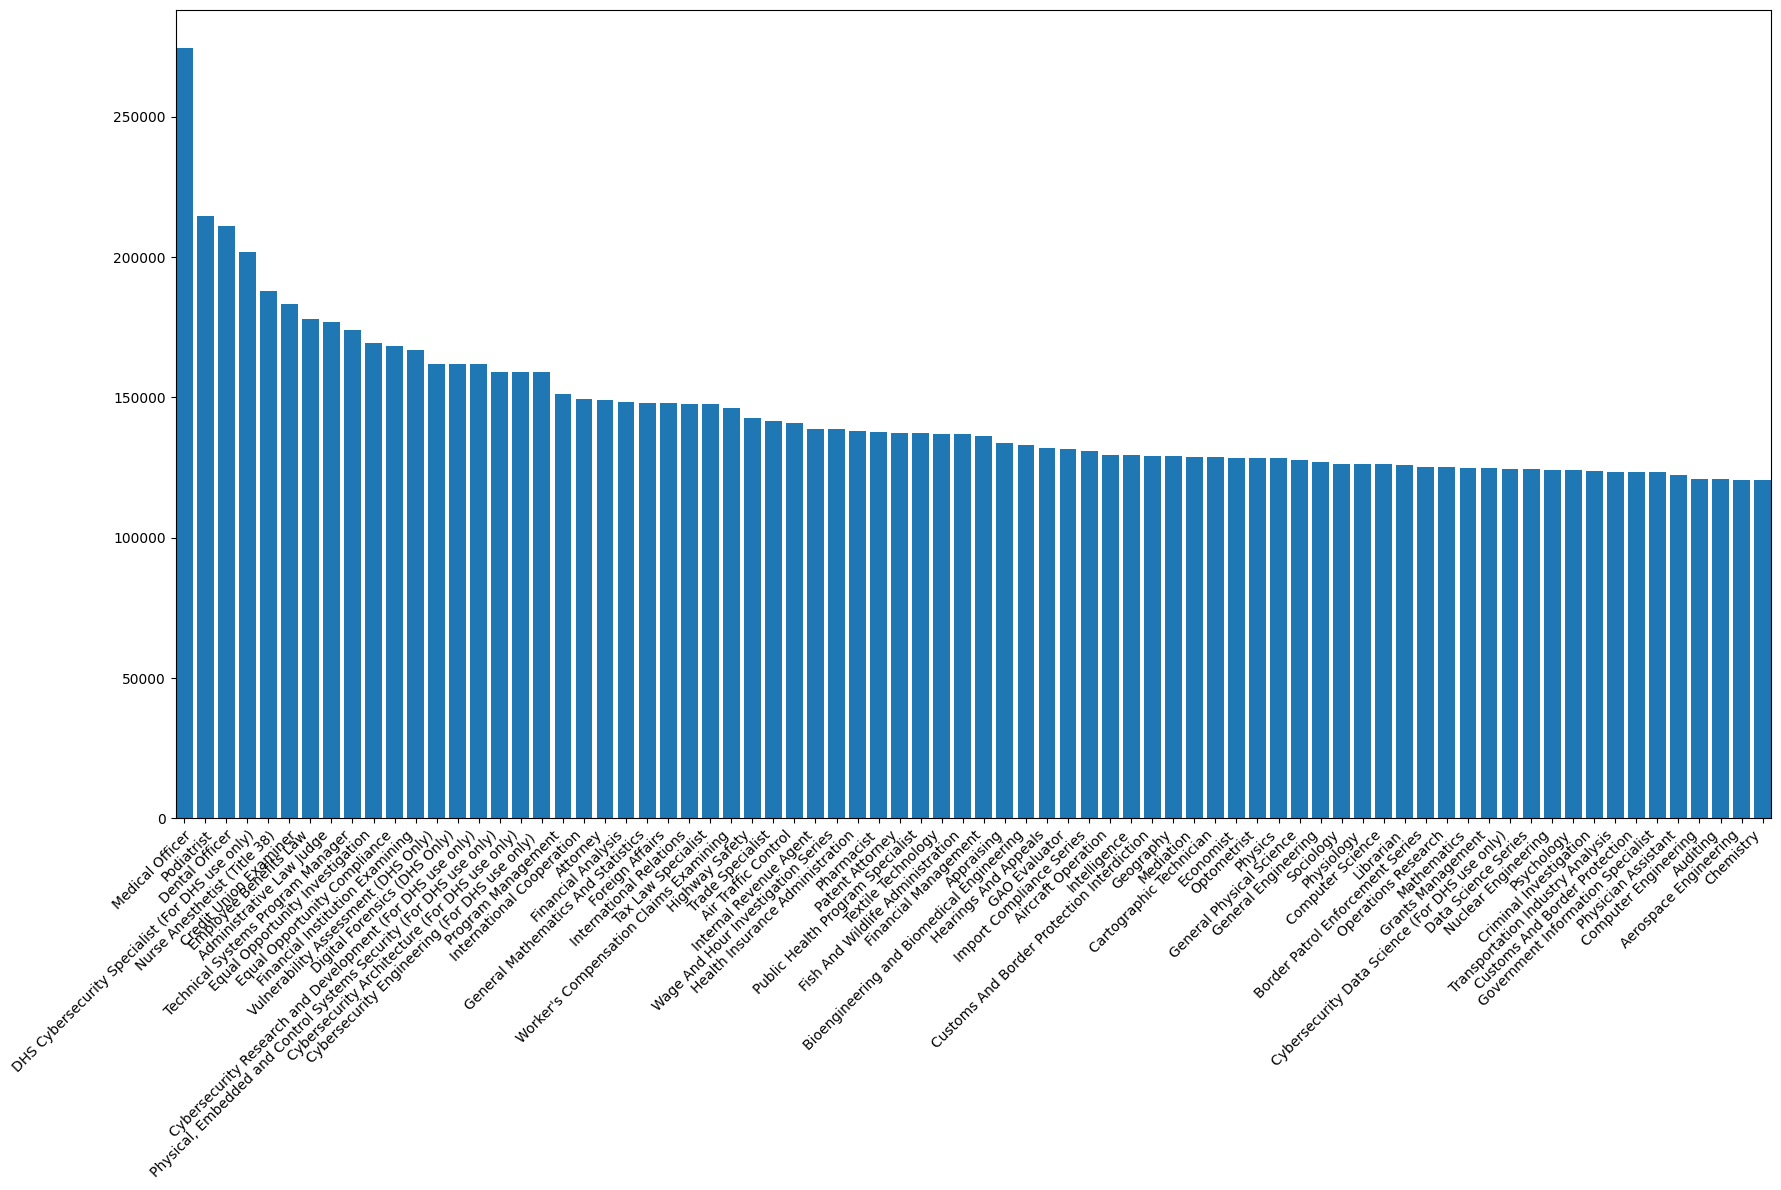

In [126]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,12)
plt.subplot(1,1,1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.margins(x=0)
# ax.tick_params(axis='x', which='major', labelsize=6)
plt.bar(f_dict.keys(), f_dict.values())
plt.tight_layout()
plt.show()

In [127]:
pay_dict = {}
cat_dict_pa = {}
rate_int_dict = {}
for o in range(len(org_code)):
    
    with open(f'./Data/posting_data/USAJOBS_postings_{org_code[o]}.json', 'r') as file:
        data = json.load(file)    

    for i in range(len(data)):
        cat_list = [cat_list for cat_list in data[i]['MatchedObjectDescriptor']['JobCategory']]

        try:
            rate_int_dict[data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['RateIntervalCode']] += 1
        except:
            rate_int_dict[data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['RateIntervalCode']] = 1
        
        for c in cat_list: 
            if data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['RateIntervalCode'] == 'PA':
                try:
                    cat_dict_pa[c['Name']] += 1
                    pay_dict[c['Name']] += float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MinimumRange'])
                except:
                    cat_dict_pa[c['Name']] = 1
                    pay_dict[c['Name']] = float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MinimumRange'])

In [128]:
for key in pay_dict.keys():
    pay_dict[key] = pay_dict[key]/cat_dict_pa[key]

In [129]:
pay_dict = OrderedDict(sorted(pay_dict.items(), key=lambda item: item[1], reverse=True))

In [132]:
f_dict = {k: v for k, v in pay_dict.items() if v > 100000}

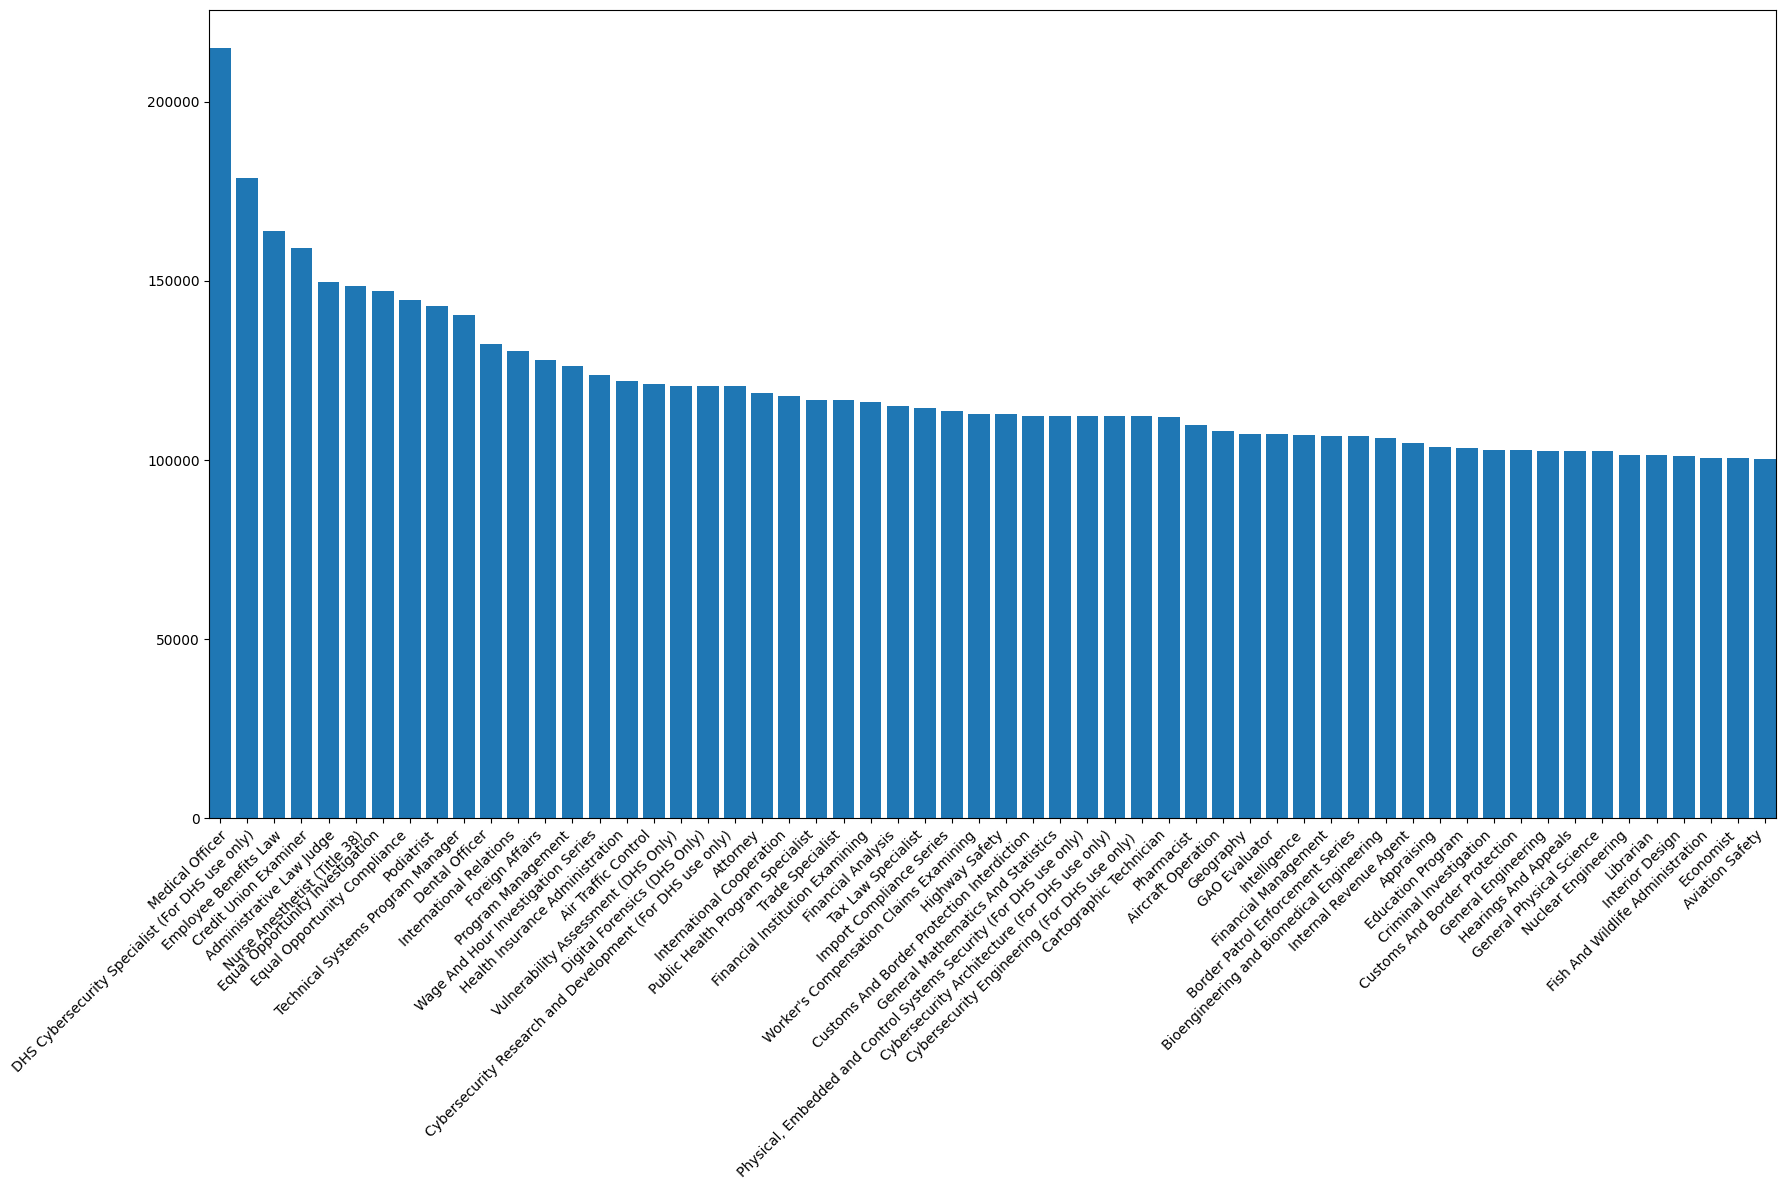

In [133]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,12)
plt.subplot(1,1,1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.margins(x=0)
# ax.tick_params(axis='x', which='major', labelsize=6)
plt.bar(f_dict.keys(), f_dict.values())
plt.tight_layout()
plt.show()

In [136]:

grade_dict = {}
for o in range(len(org_code)):
    with open(f'./Data/posting_data/USAJOBS_postings_{org_code[o]}.json', 'r') as file:
        data = json.load(file)    

    for i in range(len(data)):
        base = data[i]['MatchedObjectDescriptor']
        grade = base['JobGrade'][0]['Code']
        if grade == 'GS':
            num_low = int(base['UserArea']['Details']['LowGrade'])
            num_high = int(base['UserArea']['Details']['HighGrade'])
            for j in range(num_low, num_high+1):
                try:
                    grade_dict[f'{grade}-{str(j)}'] += 1
                except:
                    grade_dict[f'{grade}-{str(j)}'] = 1
            

In [137]:
grade_dict = OrderedDict(sorted(grade_dict.items(), key=lambda item: item[1], reverse=True))

In [147]:
grade_dict = OrderedDict(sorted(grade_dict.items(), key=lambda item: int(item[0].split('-')[1])))

In [148]:
f_dict = {k: v for k, v in pay_dict.items() if v > 100000}

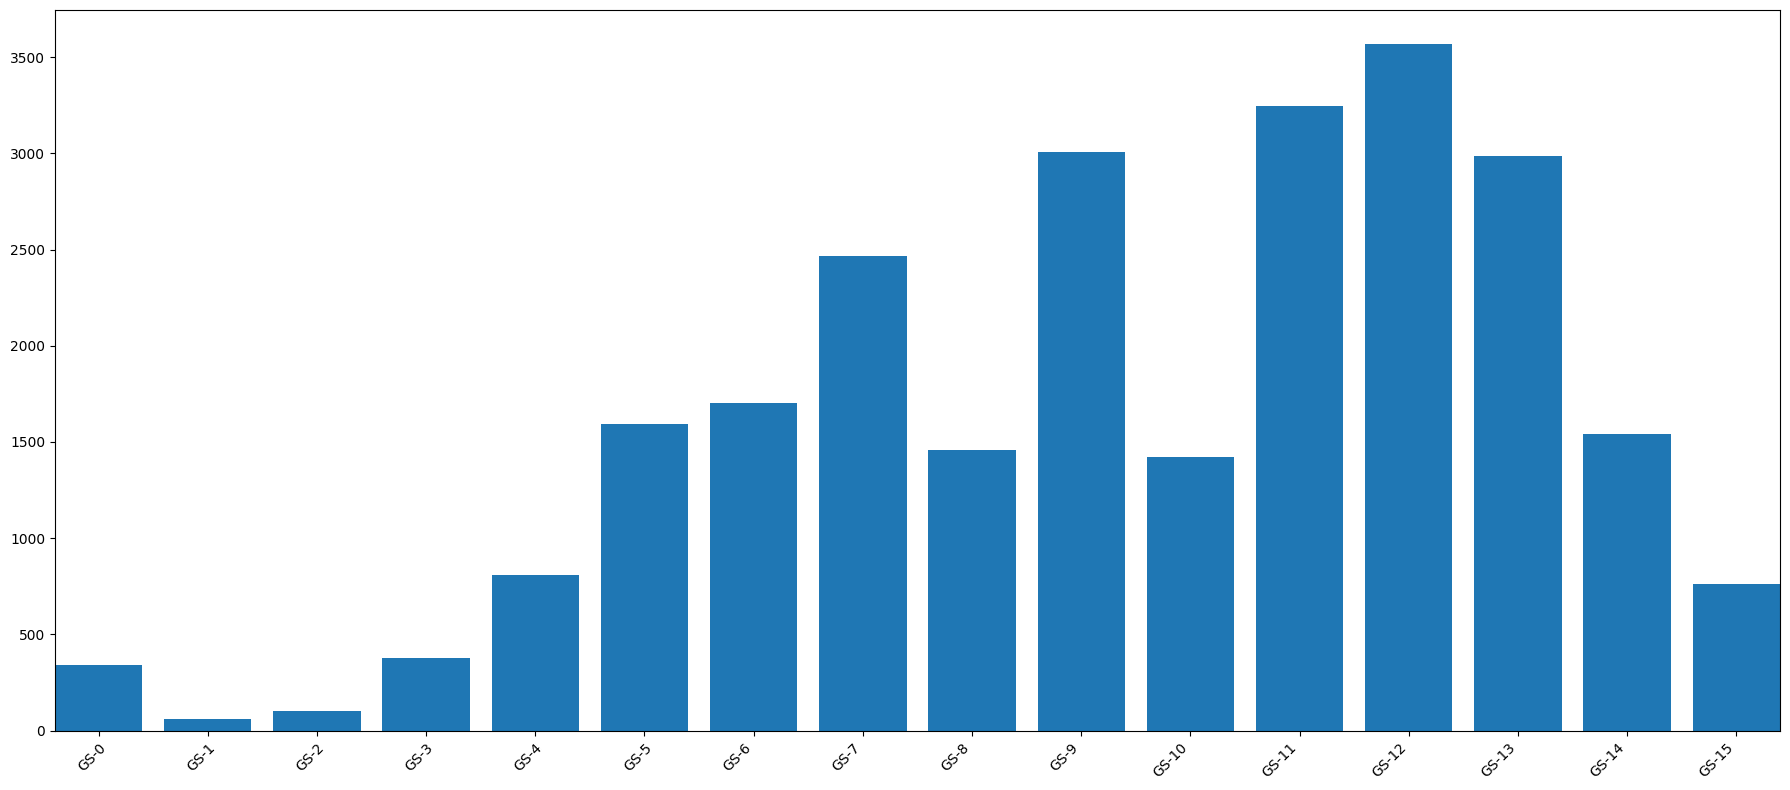

In [150]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18,8)
plt.subplot(1,1,1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.margins(x=0)
# ax.tick_params(axis='x', which='major', labelsize=6)
plt.bar(grade_dict.keys(), grade_dict.values())
plt.tight_layout()
plt.show()

In [20]:
grade_dict = []
grade_pay_dict = []
for o in range(len(org_code)):
    
    with open(f'./Data/posting_data/USAJOBS_postings_{org_code[o]}.json', 'r') as file:
        data = json.load(file)    

    for i in range(len(data)):
        base = data[i]['MatchedObjectDescriptor']
        # cat_list = [cat_list for cat_list in data[i]['MatchedObjectDescriptor']['JobCategory']]
        grade = base['JobGrade'][0]['Code'] + '-' + base['UserArea']['Details']['LowGrade']
        try:
            grade_dict[f'{grade}'] += 1
            grade_pay_dict[f'{grade}'] += float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MinimumRange'])
        except:
            grade_dict[f'{grade}'] = 1
            grade_pay_dict[f'{grade}'] = float(data[i]['MatchedObjectDescriptor']['PositionRemuneration'][0]['MinimumRange'])
        

In [21]:
for i in grade_pay_dict.keys():
    grade_pay_dict[i] = grade_pay_dict[i]/grade_dict[i]

In [22]:
grade_pay_dict = OrderedDict(sorted(grade_pay_dict.items(), key=lambda item: item[1], reverse=True))

In [23]:
grade_pay_dict

OrderedDict([('SS-2', 281314.0),
             ('EM-00', 275000.0),
             ('SS-1', 264562.0),
             ('AD-15', 252566.7138235294),
             ('LL-1', 250775.0),
             ('VN-15', 238750.0),
             ('VM-3', 235000.0),
             ('VM-15', 230946.3349056604),
             ('VM-00', 220382.84246575343),
             ('AT-LL', 204330.0),
             ('DB-6', 203392.0),
             ('VH-43', 200630.0),
             ('AT-LK', 194584.0),
             ('AD-28', 191039.0),
             ('HS-14', 190625.0),
             ('AT-KK', 190223.0),
             ('SK-17', 189454.5),
             ('AT-LJ', 182025.0),
             ('CP-13', 178896.0),
             ('DL-00', 178650.0),
             ('RF-00', 178564.66666666666),
             ('EN-5', 174300.0),
             ('AT-KJ', 173616.0),
             ('VN-5', 173549.0),
             ('VP-15', 172938.8),
             ('JS-16', 172632.0),
             ('ES-00', 169891.62295081967),
             ('FP-01', 169186.0),
       